In [11]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from PIL import Image
from torchvision import transforms
from torchvision.models import vgg16
import glob

In [8]:
DATA_DIR = os.path.join(os.path.abspath(".."), "cons454_project/data/")

In [9]:
def classify_image(img, topn = 4):
    clf = vgg16(weights='VGG16_Weights.DEFAULT') # initialize the classifier with VGG16 weights
    preprocess = transforms.Compose([
                 transforms.Resize(299),
                 transforms.CenterCrop(299),
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                     std=[0.229, 0.224, 0.225]),])

    with open(DATA_DIR + 'imagenet_classes.txt') as f:
        classes = [line.strip() for line in f.readlines()]
    
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    clf.eval()
    output = clf(batch_t)
    _, indices = torch.sort(output, descending=True)
    probabilities = torch.nn.functional.softmax(output, dim=1)
    d = {'Class': [classes[idx] for idx in indices[0][:topn]], 
         'Probability score': [np.round(probabilities[0, idx].item(),3) for idx in indices[0][:topn]]}
    df = pd.DataFrame(d, columns = ['Class','Probability score'])
    return df

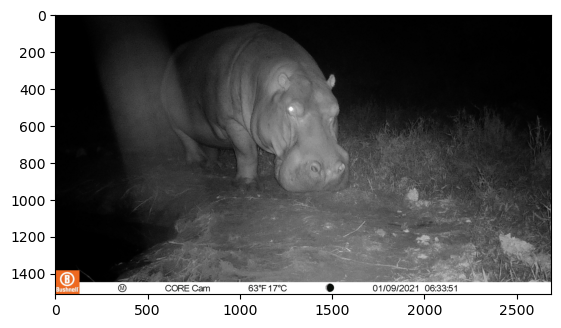

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\benso/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [00:08<00:00, 65.8MB/s]


                                                   Class  Probability score
hippopotamus, hippo, river horse, Hippopotamus amphibius              0.736
                 hog, pig, grunter, squealer, Sus scrofa              0.219
                             wild boar, boar, Sus scrofa              0.008
                                               armadillo              0.008
--------------------------------------------------------------


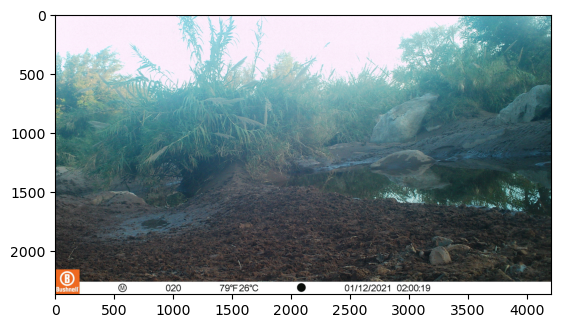

                               Class  Probability score
                        valley, vale              0.321
promontory, headland, head, foreland              0.075
                                 alp              0.073
                          coral reef              0.058
--------------------------------------------------------------


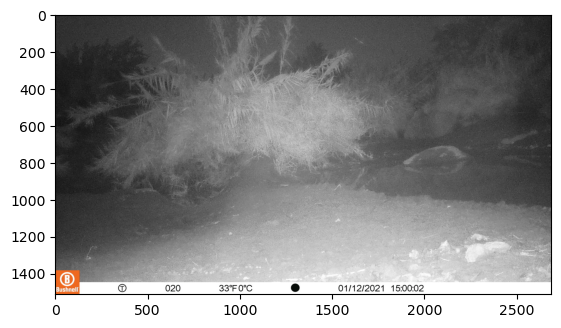

                        Class  Probability score
                          hay              0.141
                      volcano              0.032
  West Highland white terrier              0.032
Scottish deerhound, deerhound              0.025
--------------------------------------------------------------


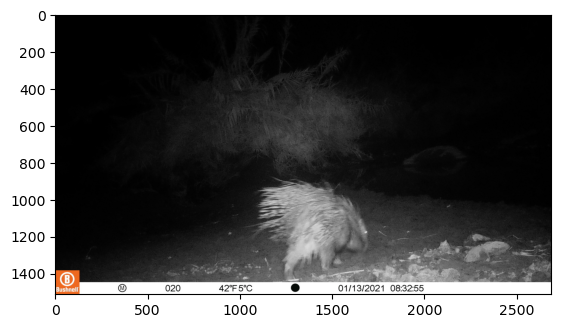

                     Class  Probability score
                    badger              0.244
       porcupine, hedgehog              0.208
skunk, polecat, wood pussy              0.174
             hyena, hyaena              0.044
--------------------------------------------------------------


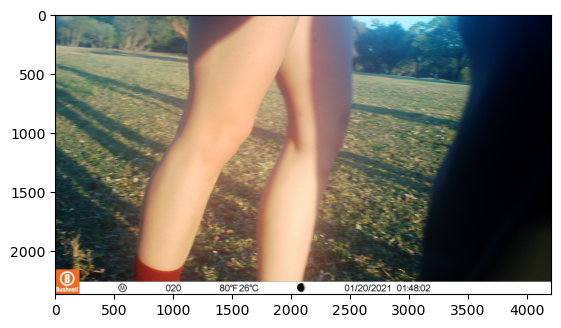

                          Class  Probability score
                        maillot              0.159
             maillot, tank suit              0.155
              bikini, two-piece              0.112
swimming trunks, bathing trunks              0.048
--------------------------------------------------------------


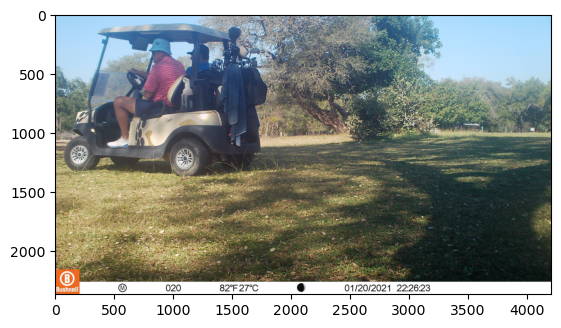

              Class  Probability score
golfcart, golf cart              0.199
         half track              0.172
            Model T              0.108
            tractor              0.082
--------------------------------------------------------------


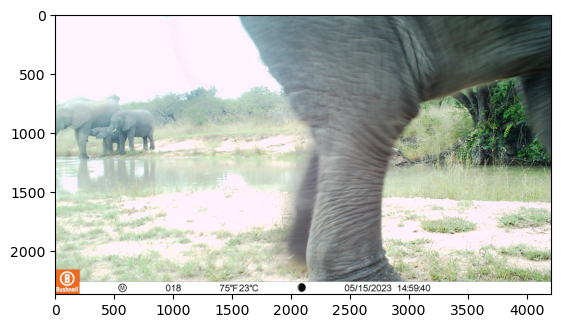

                                                   Class  Probability score
                        Indian elephant, Elephas maximus              0.416
                    African elephant, Loxodonta africana              0.301
                                                  tusker              0.278
hippopotamus, hippo, river horse, Hippopotamus amphibius              0.002
--------------------------------------------------------------


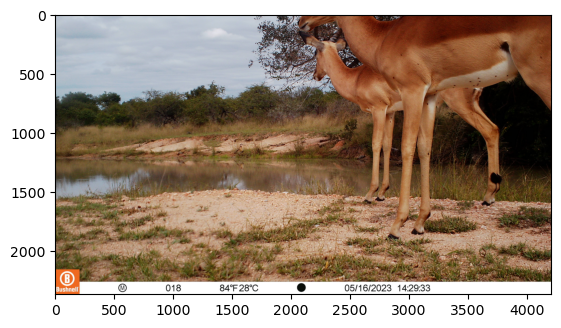

                     Class  Probability score
impala, Aepyceros melampus              0.401
                hartebeest              0.258
                    sorrel              0.214
                   gazelle              0.078
--------------------------------------------------------------


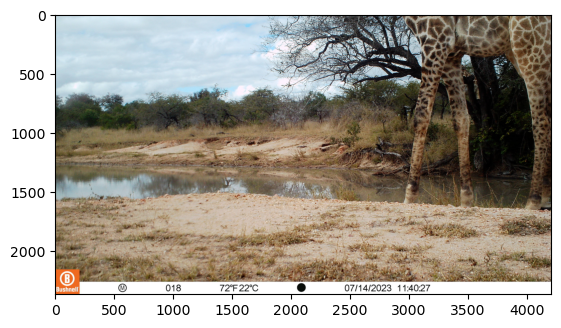

                            Class  Probability score
                    hyena, hyaena              0.159
                            zebra              0.153
cheetah, chetah, Acinonyx jubatus              0.134
                          bustard              0.057
--------------------------------------------------------------


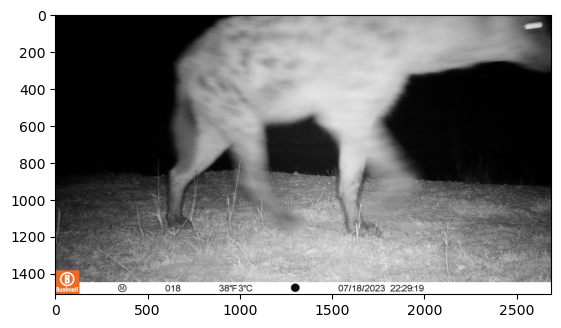

                                          Class  Probability score
                                       ram, tup              0.085
          Arctic fox, white fox, Alopex lagopus              0.060
                                  hyena, hyaena              0.058
coyote, prairie wolf, brush wolf, Canis latrans              0.055
--------------------------------------------------------------


In [12]:
# Predict labels with associated probabilities for unseen images
images = glob.glob(DATA_DIR + "images/*.*")
for image in images:
    img = Image.open(image)
    img.load()
    plt.imshow(img)
    plt.show()
    df = classify_image(img)
    print(df.to_string(index=False))
    print("--------------------------------------------------------------")